zavrseno: {i}
zavrseno: {i}
zavrseno: {i}
zavrseno: {i}


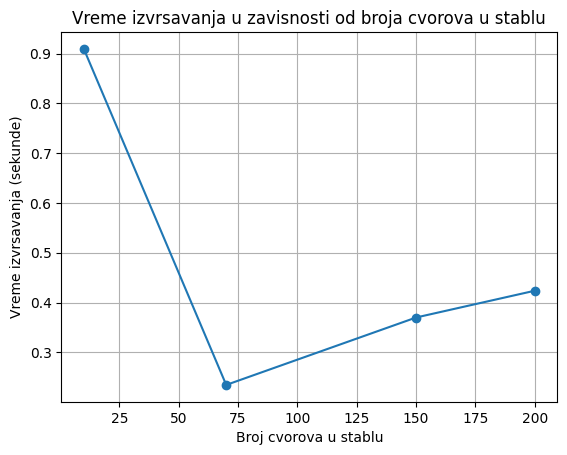

In [66]:
import networkx as nx
import random
import matplotlib.pyplot as plt
from itertools import combinations
import time



def initialize_population(T, population_size):
    population = []
    nodes = list(T.nodes())

    for _ in range(population_size):
        subgraph_nodes = random.sample(nodes, random.randint(2, len(nodes)))
        subgraph = T.subgraph(subgraph_nodes).copy()

        if nx.is_connected(subgraph):
            population.append(subgraph)

    return population


def contains_isomorphic_subtree(graph, H):
    for h in H:
        for sub_nodes in combinations(graph.nodes(), len(h.nodes())):
            subgraph = graph.subgraph(sub_nodes)
            if nx.is_isomorphic(subgraph, h):
                return True
    return False



def calc_fitness(subgraph, H):
    
    if subgraph is None or subgraph.number_of_nodes() == 0:
        return 0
    if not nx.is_connected(subgraph):
        return 0
    if contains_isomorphic_subtree(subgraph, H):
        return 0
   
    return subgraph.number_of_edges()

def crossover(parent1, parent2, T):

    child = nx.Graph()
    for edge in parent1.edges():
        if random.random() > 0.5:
            child.add_edge(*edge)
    for edge in parent2.edges():
        if random.random() > 0.5 and not child.has_edge(*edge):
            child.add_edge(*edge)
            
    child = nx.intersection(T, child)

    return child
                
    
def mutation(subgraph, T):
    if random.random() > 0.5:
        possible_edges = list(set(T.edges()) - set(subgraph.edges()))
        if possible_edges:
            edge_to_add = random.choice(possible_edges)
            subgraph.add_edge(*edge_to_add)
    else:
        if subgraph.number_of_edges() > 0:
            edge_to_remove = random.choice(list(subgraph.edges()))
            subgraph.remove_edge(*edge_to_remove)
    
    return subgraph
        
def selection(population, H, tournament_size=5):
    best_fitness = None 
    index = -1
    for _ in range(tournament_size):
        individual = random.randrange(len(population))
        if calc_fitness(population[individual], H) < 0:
            best_fitness = calc_fitness(individual, H)
            index = individual
    return population[index]


def genetski(T, H, population_size = 50, generations = 100):

    population = initialize_population(T, population_size)
    new_population = []
    
    for generation in range(generations):
        population = sorted(population, key = lambda g: calc_fitness(g, H), reverse=True)
        best_fitness = calc_fitness(population[0], H)
        if best_fitness == T.number_of_nodes():
            break

        new_population[:population_size//5] = population[:population_size // 5]
        while len(new_population) < population_size:
            parent1 = selection(population, H, 5)
            parent2 = selection(population, H, 5)
            child = crossover(parent1, parent2, T)
            if random.random() < 0.1:
                child = mutation(child, T)
            new_population.append(child)

        population = new_population

    return population[0]

def generate_instance(N, num_of_subtrees):
    T = nx.random_tree(N)
    H = []
    nodes = list(T.nodes)

    for i in range(num_of_subtrees):
        subtree_nodes = random.sample(nodes, 10)
        subtree = T.subgraph(subtree_nodes).copy()
        if nx.is_connected(subtree):
            H.append(subtree)
    return T, H





def merenje_vremena(maximum_subforest_function, tree_sizes, num_of_subtrees):
    times = []
    i = 1
    for N in tree_sizes:
        T, H = generate_instance(N, num_of_subtrees)
        start = time.time()
        subforest = maximum_subforest_function(T, H)
        print("zavrseno: {i}")
        i = i+1
        end = time.time()
        time_elapsed = end - start
        times.append(time_elapsed)
    return times
    
tree_sizes = [10, 70, 150, 200]
times = merenje_vremena(genetski, tree_sizes, 5)
plt.plot(tree_sizes, times, marker='o')
plt.xlabel('Broj cvorova u stablu')
plt.ylabel('Vreme izvrsavanja (sekunde)')
plt.title('Vreme izvrsavanja u zavisnosti od broja cvorova u stablu')
plt.grid(True)
plt.show()